In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/call-prediction/sample_submission.csv
/kaggle/input/call-prediction/train.csv
/kaggle/input/call-prediction/test.csv


In [10]:
train=pd.read_csv("/kaggle/input/call-prediction/train.csv")
train

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [11]:
train["전화해지여부"].value_counts()

0    26882
1     3318
Name: 전화해지여부, dtype: int64

In [12]:
test=pd.read_csv("/kaggle/input/call-prediction/test.csv")
test

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
0,TEST_00000,110,0,210.7,142,35.6,205.9,93,17.43,120.9,111,5.37,2
1,TEST_00001,283,1,268.5,100,30.3,283.0,92,28.32,290.0,89,8.82,0
2,TEST_00002,34,1,243.3,205,21.3,225.7,205,29.00,92.6,29,2.44,2
3,TEST_00003,209,86,83.0,93,24.1,270.6,220,22.89,266.9,81,2.80,6
4,TEST_00004,202,0,293.2,23,31.0,294.0,24,26.39,223.8,33,6.66,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12938,TEST_12938,322,1,282.4,202,89.9,270.2,321,32.80,293.6,321,8.88,2
12939,TEST_12939,222,0,233.5,209,34.6,234.0,92,23.22,224.4,202,9.63,2
12940,TEST_12940,98,29,223.4,209,29.3,223.9,203,28.82,230.0,208,22.26,2
12941,TEST_12941,23,30,241.3,222,24.7,234.3,93,22.23,223.1,33,9.93,0


In [13]:
alldata=pd.concat([train,test])
alldata

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0.0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0.0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0.0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0.0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12938,TEST_12938,322,1,282.4,202,89.9,270.2,321,32.80,293.6,321,8.88,2,NaN
12939,TEST_12939,222,0,233.5,209,34.6,234.0,92,23.22,224.4,202,9.63,2,NaN
12940,TEST_12940,98,29,223.4,209,29.3,223.9,203,28.82,230.0,208,22.26,2,NaN
12941,TEST_12941,23,30,241.3,222,24.7,234.3,93,22.23,223.1,33,9.93,0,NaN


In [14]:
# alldata["상담전화여부"] = alldata["상담전화건수"].apply(lambda x: 0 if x == 0 else 2 if x > 2 else 1)
# a=alldata.groupby("상담전화여부")["음성사서함이용"].agg(["mean","count","std","max"])
# alldata= pd.merge(alldata,a,on="상담전화여부",how="left")

In [15]:
alldata["평균음성사서함"] = alldata["음성사서함이용"] / alldata["가입일"]
alldata.groupby("전화해지여부")["평균음성사서함"].mean()
alldata

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부,평균음성사서함
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0.0,0.000000
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0.0,40.000000
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0.0,0.301075
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0.0,0.004484
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12938,TEST_12938,322,1,282.4,202,89.9,270.2,321,32.80,293.6,321,8.88,2,NaN,0.003106
12939,TEST_12939,222,0,233.5,209,34.6,234.0,92,23.22,224.4,202,9.63,2,NaN,0.000000
12940,TEST_12940,98,29,223.4,209,29.3,223.9,203,28.82,230.0,208,22.26,2,NaN,0.295918
12941,TEST_12941,23,30,241.3,222,24.7,234.3,93,22.23,223.1,33,9.93,0,NaN,1.304348


In [16]:
alldata["통화요금"] = alldata["주간통화요금"] + alldata["저녁통화요금"]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
sns.countplot(data=alldata,x="통화요금",y="전화해지여부",showfliers=False)

In [17]:
alldata["상담전화여부"] = alldata["상담전화건수"].apply(lambda x: 0 if x==0 else 1)
alldata["음성사서함이용여부"] = alldata["음성사서함이용"].apply(lambda x: 1 if x>0 else 0)

<AxesSubplot:xlabel='전화해지여부', ylabel='음성사서함이용'>

/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **k

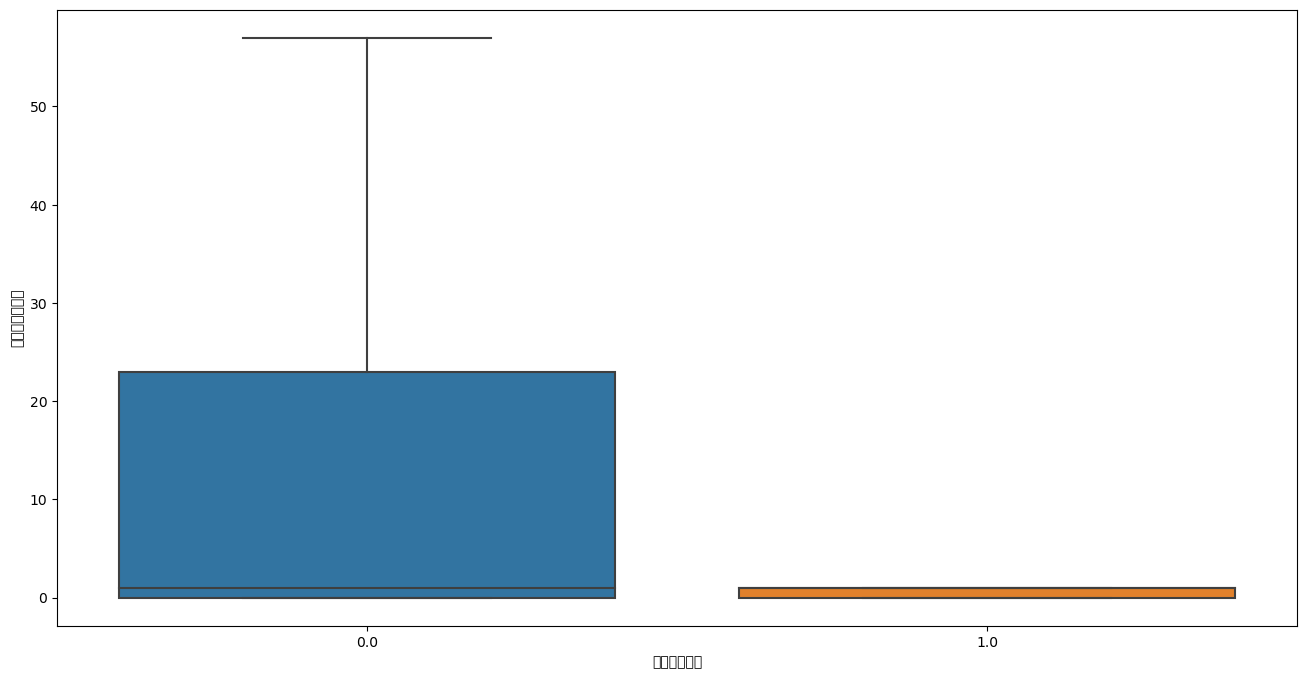

In [37]:
plt.figure(figsize=(16,8))
sns.boxplot(data=alldata,x="전화해지여부",y="음성사서함이용",showfliers=False)

<AxesSubplot:xlabel='전화해지여부', ylabel='상담전화건수'>

/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **k

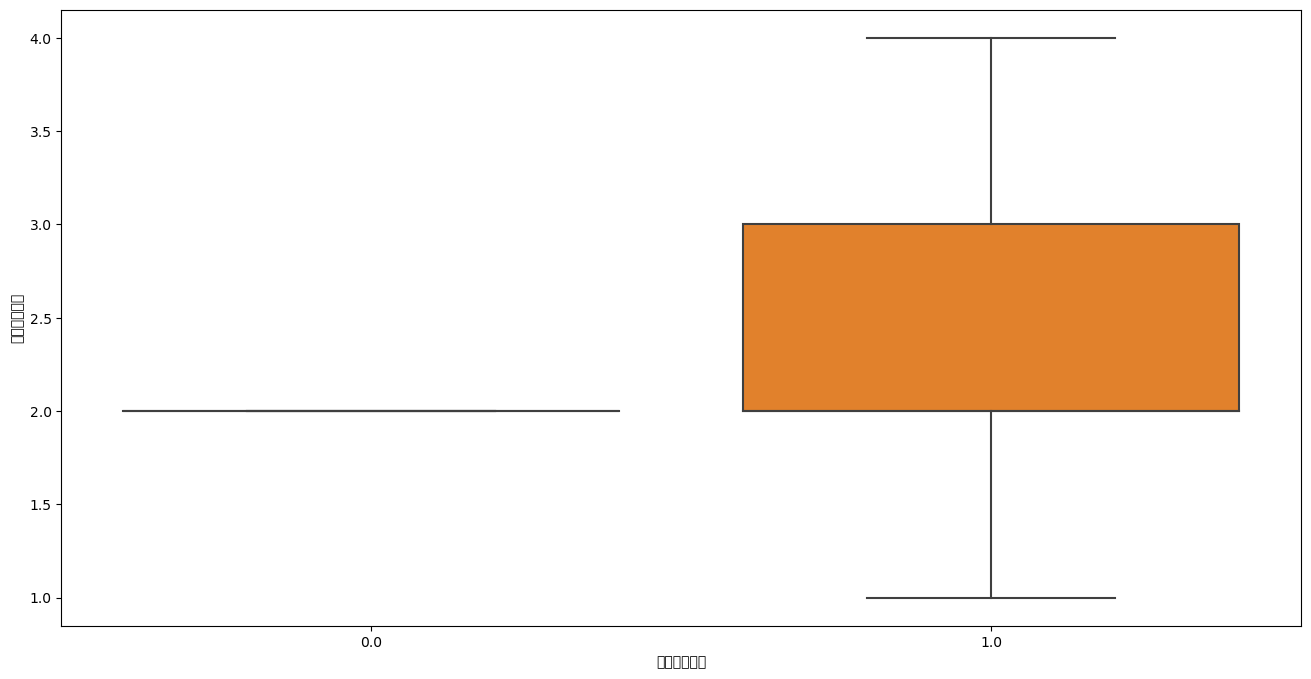

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
sns.boxplot(data=alldata,x="전화해지여부",y="상담전화건수",showfliers=False,)

In [ ]:
alldata["가입일_3"] = alldata["가입일"].apply(lambda x: 0 if x <= 7 else 2 if x>30 else 1)
a = alldata.groupby("가입일_3")["주간통화요금", "밤통화시간", "밤통화횟수",].agg(["mean", "sum", "count", "std", "max"])
alldata = pd.merge(alldata, a, how = "left", on = "가입일_3")

In [146]:
alldata["상담전화카테고리"] = alldata["상담전화건수"].apply(lambda x: 0 if x==0 else 1 if ((x==1)) else 2 if ((x==2)|(x==3)) else 3 )#|(x==4)
b = alldata.groupby("상담전화카테고리")["저녁통화시간"].agg(["mean", "sum", "count", "std", "max",])
alldata = pd.merge(alldata, b, how = "left", on = "상담전화카테고리")

In [147]:
#내가 추가한 칼럼
# b = alldata.groupby("")["상담전화여부"].mean()
# alldata = pd.merge(alldata,b,on="주간통화요금",how="left")
# alldata
#best_score 가 아주살짝 좋아짐.
# pd.options.display.max_columns=999
# alldata["요금"] = alldata["통화요금"] / alldata["가입일"]
# alldata.groupby("음성사서함이용")["요금"].mean()
# alldata

In [148]:
alldata2=alldata.drop(columns=["ID","전화해지여부","가입일_3","상담전화카테고리"])
alldata2

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,평균음성사서함,통화요금,상담전화여부,음성사서함이용여부,"(주간통화요금, mean)","(주간통화요금, sum)","(주간통화요금, count)","(주간통화요금, std)","(주간통화요금, max)","(밤통화시간, mean)","(밤통화시간, sum)","(밤통화시간, count)","(밤통화시간, std)","(밤통화시간, max)","(밤통화횟수, mean)","(밤통화횟수, sum)","(밤통화횟수, count)","(밤통화횟수, std)","(밤통화횟수, max)",mean,sum,count,std,max
0,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0.000000,56.22,1,0,41.157451,1561019.8,37928,23.043226,118.6,266.268580,10099034.7,37928,76.476869,481.8,158.606518,6015628,37928,103.512500,490,248.086617,6269396.9,25271,48.889982,451.4
1,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,40.000000,115.79,1,1,44.200966,9149.6,207,24.477860,90.8,243.194203,50341.2,207,82.156311,477.8,135.908213,28133,207,105.480023,449,248.086617,6269396.9,25271,48.889982,451.4
2,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0.301075,67.02,0,1,41.157451,1561019.8,37928,23.043226,118.6,266.268580,10099034.7,37928,76.476869,481.8,158.606518,6015628,37928,103.512500,490,263.000022,2363581.2,8987,75.816204,481.4
3,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0.004484,49.00,0,1,41.157451,1561019.8,37928,23.043226,118.6,266.268580,10099034.7,37928,76.476869,481.8,158.606518,6015628,37928,103.512500,490,263.000022,2363581.2,8987,75.816204,481.4
4,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0.000000,56.78,1,0,41.157451,1561019.8,37928,23.043226,118.6,266.268580,10099034.7,37928,76.476869,481.8,158.606518,6015628,37928,103.512500,490,323.123871,2489346.3,7704,105.727774,481.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43138,322,1,282.4,202,89.9,270.2,321,32.80,293.6,321,8.88,2,0.003106,122.70,1,1,41.157451,1561019.8,37928,23.043226,118.6,266.268580,10099034.7,37928,76.476869,481.8,158.606518,6015628,37928,103.512500,490,248.086617,6269396.9,25271,48.889982,451.4
43139,222,0,233.5,209,34.6,234.0,92,23.22,224.4,202,9.63,2,0.000000,57.82,1,0,41.157451,1561019.8,37928,23.043226,118.6,266.268580,10099034.7,37928,76.476869,481.8,158.606518,6015628,37928,103.512500,490,248.086617,6269396.9,25271,48.889982,451.4
43140,98,29,223.4,209,29.3,223.9,203,28.82,230.0,208,22.26,2,0.295918,58.12,1,1,41.157451,1561019.8,37928,23.043226,118.6,266.268580,10099034.7,37928,76.476869,481.8,158.606518,6015628,37928,103.512500,490,248.086617,6269396.9,25271,48.889982,451.4
43141,23,30,241.3,222,24.7,234.3,93,22.23,223.1,33,9.93,0,1.304348,46.93,0,1,39.934804,199993.5,5008,23.808004,116.8,244.428474,1224097.8,5008,47.994978,478.8,147.779553,740080,5008,85.841581,481,263.000022,2363581.2,8987,75.816204,481.4


In [149]:
train2=alldata2[:len(train)]
test2=alldata2[len(train):]

In [150]:
#내부 교차검증 최적화 ㅣlgbm extra tree , deep learning
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
cbc = CatBoostClassifier(verbose = 100, learning_rate=0.05, iterations=10000)#결과 너무 자주나오는거 귀찮으니깐
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=62)#10등분이 조금 더 좋음 이 대회에서
result = 0 #여기다 가중치 담아줄거다
best_score=0 #점수 저장후 평균 점수 나타낼거임

for train_index,valid_index in skf.split(train2,train["전화해지여부"]):
    x_train= train2.iloc[train_index]
    x_valid= train2.iloc[valid_index]
    y_train= train["전화해지여부"].iloc[train_index]
    y_valid= train["전화해지여부"].iloc[valid_index]
    cbc.fit(x_train,y_train,eval_set=(x_valid,y_valid),early_stopping_rounds=200)
    result+= cbc.predict_proba(test2) / 10
    best_score+= cbc.best_score_["validation"]["Logloss"] / 10 #이중딕셔너리로 되어있어서 껍데이 뜯어야함, #회기면 rmse,
    
    



0:	learn: 0.6529590	test: 0.6531441	best: 0.6531441 (0)	total: 11ms	remaining: 1m 49s
100:	learn: 0.3051942	test: 0.3178615	best: 0.3178615 (100)	total: 1.21s	remaining: 1m 58s
200:	learn: 0.2796704	test: 0.3005953	best: 0.3005953 (200)	total: 2.86s	remaining: 2m 19s
300:	learn: 0.2568581	test: 0.2852411	best: 0.2852411 (300)	total: 4.13s	remaining: 2m 12s
400:	learn: 0.2369302	test: 0.2731060	best: 0.2731060 (400)	total: 5.4s	remaining: 2m 9s
500:	learn: 0.2197409	test: 0.2635158	best: 0.2635158 (500)	total: 6.7s	remaining: 2m 7s
600:	learn: 0.2056804	test: 0.2560409	best: 0.2560409 (600)	total: 7.97s	remaining: 2m 4s
700:	learn: 0.1927480	test: 0.2487205	best: 0.2487205 (700)	total: 9.25s	remaining: 2m 2s
800:	learn: 0.1818005	test: 0.2435379	best: 0.2435379 (800)	total: 10.5s	remaining: 2m
900:	learn: 0.1721328	test: 0.2383945	best: 0.2383945 (900)	total: 11.9s	remaining: 1m 59s
1000:	learn: 0.1632582	test: 0.2342739	best: 0.2342739 (1000)	total: 13.6s	remaining: 2m 1s
1100:	learn: 

In [151]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
lgb = LGBMClassifier(learning_rate=0.05, n_estimators=10000)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)
result_lgb = 0 
best_score_lgb=0 

for train_index,valid_index in skf.split(train2,train["전화해지여부"]):
    x_train= train2.iloc[train_index]
    x_valid= train2.iloc[valid_index]
    y_train= train["전화해지여부"].iloc[train_index]
    y_valid= train["전화해지여부"].iloc[valid_index]
    lgb.fit(np.array(x_train),y_train,eval_set=(np.array(x_valid),y_valid),early_stopping_rounds=200,verbose=200)
    result_lgb+= lgb.predict_proba(test2) / 10
    best_score_lgb+= lgb.best_score_["valid_0"]["binary_logloss"] / 10 #이중딕셔너리로 되어있어서 껍데이 뜯어야함, #회기면 rmse,

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	valid_0's binary_logloss: 0.249054
[400]	valid_0's binary_logloss: 0.220878
[600]	valid_0's binary_logloss: 0.20686
[800]	valid_0's binary_logloss: 0.198353
[1000]	valid_0's binary_logloss: 0.194438
[1200]	valid_0's binary_logloss: 0.191981
[1400]	valid_0's binary_logloss: 0.192622


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	valid_0's binary_logloss: 0.256684
[400]	valid_0's binary_logloss: 0.228409
[600]	valid_0's binary_logloss: 0.215257
[800]	valid_0's binary_logloss: 0.207817
[1000]	valid_0's binary_logloss: 0.204414
[1200]	valid_0's binary_logloss: 0.204372
[1400]	valid_0's binary_logloss: 0.204921


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	valid_0's binary_logloss: 0.253501
[400]	valid_0's binary_logloss: 0.226779
[600]	valid_0's binary_logloss: 0.211193
[800]	valid_0's binary_logloss: 0.204859
[1000]	valid_0's binary_logloss: 0.201651
[1200]	valid_0's binary_logloss: 0.199476
[1400]	valid_0's binary_logloss: 0.201468


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	valid_0's binary_logloss: 0.248118
[400]	valid_0's binary_logloss: 0.218825
[600]	valid_0's binary_logloss: 0.201056
[800]	valid_0's binary_logloss: 0.190583
[1000]	valid_0's binary_logloss: 0.186366
[1200]	valid_0's binary_logloss: 0.184199
[1400]	valid_0's binary_logloss: 0.183968


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	valid_0's binary_logloss: 0.255096
[400]	valid_0's binary_logloss: 0.228813
[600]	valid_0's binary_logloss: 0.216152
[800]	valid_0's binary_logloss: 0.207675
[1000]	valid_0's binary_logloss: 0.204165
[1200]	valid_0's binary_logloss: 0.204786


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	valid_0's binary_logloss: 0.247975
[400]	valid_0's binary_logloss: 0.220825
[600]	valid_0's binary_logloss: 0.209802
[800]	valid_0's binary_logloss: 0.203596
[1000]	valid_0's binary_logloss: 0.201429
[1200]	valid_0's binary_logloss: 0.200364


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	valid_0's binary_logloss: 0.24896
[400]	valid_0's binary_logloss: 0.221486
[600]	valid_0's binary_logloss: 0.206833
[800]	valid_0's binary_logloss: 0.199179
[1000]	valid_0's binary_logloss: 0.19406
[1200]	valid_0's binary_logloss: 0.193805


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	valid_0's binary_logloss: 0.256813
[400]	valid_0's binary_logloss: 0.231148
[600]	valid_0's binary_logloss: 0.21692
[800]	valid_0's binary_logloss: 0.211313
[1000]	valid_0's binary_logloss: 0.20801
[1200]	valid_0's binary_logloss: 0.206502


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	valid_0's binary_logloss: 0.250454
[400]	valid_0's binary_logloss: 0.225291
[600]	valid_0's binary_logloss: 0.211461
[800]	valid_0's binary_logloss: 0.20434
[1000]	valid_0's binary_logloss: 0.200125
[1200]	valid_0's binary_logloss: 0.198846
[1400]	valid_0's binary_logloss: 0.199894


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	valid_0's binary_logloss: 0.250098
[400]	valid_0's binary_logloss: 0.221899
[600]	valid_0's binary_logloss: 0.208081
[800]	valid_0's binary_logloss: 0.198735
[1000]	valid_0's binary_logloss: 0.194943
[1200]	valid_0's binary_logloss: 0.193563


In [152]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=900, n_jobs = -1)
etc.fit(np.array(train2), train["전화해지여부"])
result_etc = etc.predict_proba(np.array(test2))
result_etc

#배깅 평가셋 실시간 확인못함

array([[0.90777778, 0.09222222],
       [0.98888889, 0.01111111],
       [0.93666667, 0.06333333],
       ...,
       [0.98333333, 0.01666667],
       [0.99888889, 0.00111111],
       [0.98444444, 0.01555556]])

In [153]:
from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.callbacks import *

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler #숫자적인 느낌으로 학습하니깐 범위가 어느정도 비슷해야함.

ss = StandardScaler()

alldata_dl = ss.fit_transform(alldata2) 

train_dl = alldata_dl[:len(train)]
test_dl = alldata_dl[len(train):]

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=28)
result_dl = 0
best_score_dl = 0

for train_index, valid_index in skf.split(train_dl, train['전화해지여부']):
    
    x_train = train_dl[train_index]
    x_valid = train_dl[valid_index]
    
    y_train = train['전화해지여부'].iloc[train_index]
    y_valid = train['전화해지여부'].iloc[valid_index]
    
    model = Sequential()
    model.add(Dense(1024, activation='relu', input_dim=train_dl.shape[1]))
    model.add(BatchNormalization())
    model.add(Dense(512,activation='elu'))
    model.add(BatchNormalization())
    model.add(Dense(128,activation='elu'))
    model.add(BatchNormalization())
    model.add(Dense(64,activation='elu'))
    model.add(BatchNormalization())
    model.add(Dense(32,activation='elu'))
    model.add(BatchNormalization())
    model.add(Dense(2,activation='softmax'))
   
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='acc')
    
    es = EarlyStopping(patience=10, restore_best_weights=True)
    model.fit(x_train,y_train, validation_data=(x_valid,y_valid), callbacks=[es], epochs=1000, batch_size=256)
    
    result_dl += model.predict(test_dl) / 10

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


Epoch 1/1000
107/107 [==============================] - 6s 11ms/step - loss: 0.5223 - acc: 0.8071 - val_loss: 0.4010 - val_acc: 0.8904
Epoch 2/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.3442 - acc: 0.8903 - val_loss: 0.3382 - val_acc: 0.8904
Epoch 3/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.3221 - acc: 0.8903 - val_loss: 0.3298 - val_acc: 0.8904
Epoch 4/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.3162 - acc: 0.8912 - val_loss: 0.3193 - val_acc: 0.8901
Epoch 5/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.3078 - acc: 0.8922 - val_loss: 0.3295 - val_acc: 0.8930
Epoch 6/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.3040 - acc: 0.8925 - val_loss: 0.3134 - val_acc: 0.8927
Epoch 7/1000
107/107 [==============================] - 1s 7ms/step - loss: 0.2952 - acc: 0.8932 - val_loss: 0.3053 - val_acc: 0.8967
Epoch 8/1000
107/107 [==============================] - 1s 7m

In [161]:
final_result = result * 0.5 + result_lgb*0.4 + result_etc*0.07 + result_dl*0.03

In [162]:
sub=pd.read_csv("/kaggle/input/call-prediction/sample_submission.csv")
sub

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0
...,...,...
12938,TEST_12938,0
12939,TEST_12939,0
12940,TEST_12940,0
12941,TEST_12941,0


In [163]:
sub["전화해지여부"] = final_result[:,1] > 0.2
sub

,ID,전화해지여부
0,TEST_00000,False
1,TEST_00001,False
2,TEST_00002,False
3,TEST_00003,True
4,TEST_00004,True
...,...,...
12938,TEST_12938,False
12939,TEST_12939,False
12940,TEST_12940,False
12941,TEST_12941,False


In [164]:
sub["전화해지여부"].value_counts()

False    11356
True      1587
Name: 전화해지여부, dtype: int64

In [165]:
sub.to_csv("call_prediction1.csv",index=False)

In [166]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(16,8))
# sns.boxplot(data=alldata,x="전화해지여부",y="상담전화건수",showfliers=False,)

In [167]:
# plt.figure(figsize=(16,8))
# sns.boxplot(data=alldata,x="전화해지여부",y="음성사서함이용",hue="상담전화여부",showfliers=False)